<h3>One vs All Classification</h3>
<h4>Packages Used</h4>
<ul>
    <li>numpy</li>
    <li>matplotlib</li>
    <li>scipy</li>
    <li>pickle</li>
    <li>os</li>
</ul>
<h3>Import necessary packages</h3>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
import pickle
import os

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]

<h3>ReadData(data,separator): Helper function to read data</h3>
<h4> Assumes data is of the form X[0], X[1], ..., X[n], Y</h4>
<h5>Where X[i] is a feature and Y is the label</h5> 

In [3]:
def ReadData(data,separator):
    
    XY =  np.genfromtxt(data, delimiter=separator)
    m=XY.shape[0]
    Y=XY[:,-1].reshape(m,1)
    X=XY[:,0:-1]
    return X,Y,m

<h3>Normalize(data): Helper function to Normalize data</h3>

In [4]:
def Normalize(data):
    
    Mu = np.mean(X, axis=0)
    Sigma = np.std(X, axis=0)
    data = ((data-Mu)/Sigma)
    return data, Mu, Sigma

In [5]:
def mapFeature(X1, X2):
# MAPFEATURE Feature mapping function to polynomial features
#
#   MAPFEATURE(X1, X2) maps the two input features
#   to quadratic features used in the regularization exercise.
#
#   Returns a new feature array with more features, comprising of 
#   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
#   for a total of 1 + 2 + ... + (degree+1) = ((degree+1) * (degree+2)) / 2 columns
#
#   Inputs X1, X2 must be the same size

    degree = 6
    out = np.matrix(np.ones(X1.shape[0])).T
    for i in range(1,degree+1):
        for j in range(i+1):
            out = np.c_[out,np.multiply(np.power(X1,i-j),np.power(X2,j))]
    return out

<h3>GradientDescent(theta, X, Y, m, lambd): Function to calculate the Gradient</h3>

In [6]:
def GradientDescent(theta,*args):
    [X,Y,m,lambd] = args
    theta = np.squeeze(np.array(theta))
    theta = theta.reshape(theta.shape[0],1)
    grad = np.ones((theta.shape[0],1))
    H = Sigmoid(np.dot(X, theta))
    diff = H - Y
    grad = (np.dot(X.T,diff) / m) + (theta * (lambd/m))
    grad[0,0] = grad[0,0] - (theta[0,0] * (lambd/m))
    grad = np.squeeze(np.array(grad))
    return grad

<h3>GradientDescentCheck(theta,X,Y,m,lambd,total_labels,input_layer_size,hidden_layer_size): Function to cheeck the Gradient</h3>

In [7]:
def GradientDescentCheck(theta,*args):
    [X,Y,m,lambd] = args
    theta = np.squeeze(np.array(theta))
    theta = theta.reshape(theta.shape[0],1)
    epislon = 0.0001
    numgrad = np.zeros((theta.shape[0],1)) 
    for i in range(numgrad.shape[0]):
        newtheta = theta
        newtheta[i,0] = newtheta[i,0] + epislon
        loss1 = CostCalc(newtheta,X,Y,m,lambd)
        newtheta[i,0] = newtheta[i,0] -  (2 * epislon)
        loss2 = CostCalc(newtheta,X,Y,m,lambd)
        numgrad[i,0] = (loss1 - loss2) / (2 * epislon)
    return np.squeeze(np.array(numgrad))

<h3>CostCalc(theta,X,Y,m,lambd,total_labels,input_layer_size,hidden_layer_size): Function to calculate Cost, Gradient</h3>

In [8]:
def CostCalc(theta,*args):
    #Reshape theta as op.minimize gives different type of numpy data structure
    theta = np.squeeze(np.array(theta))
    theta = theta.reshape(theta.shape[0],1)
    grad = np.ones((theta.shape[0],1))
    
    [X,Y,m,lambd] = args
    
    H = Sigmoid(np.dot(X,theta))
    J = np.dot(Y.T,np.log(H)) + np.dot((1-Y).T,np.log(1-H))
    J = -J/m
    Jreg = np.sum(np.square(theta))
    Jreg = Jreg - np.square(theta[0,0])
    Jreg = (lambd/(2*m)) * Jreg
    J = J + Jreg
    J = np.squeeze(np.array(J))
    
    diff = H - Y
    grad = (np.dot(X.T,diff) / m) + (theta * (lambd/m))
    grad[0,0] = grad[0,0] - (theta[0,0] * (lambd/m))
    grad = np.squeeze(np.array(grad))

    return J,grad

<h3>ShowImages(images,gray=True): Helper function to Show images</h3>

In [9]:
def ShowImages(images,P,gray=True):
    """
    Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: unrolled images in np.array.
    size of each image must be same and a perfect square.
    i.e., sqrt(len(image)) is an integer
    """
    rows = int(np.sqrt(images.shape[0]))
    cols = rows
    while (rows * cols < images.shape[0]):
        rows = rows + 1
    xy = images[0].shape[0]
    x = int(np.sqrt(xy))
    y = x
    if(x * y != xy):
        print(f'Image size {xy} is not a perfect square\nHence aborting image plotting')
        return
    fig = plt.figure()
    plt.suptitle('Images with their predictions', fontsize=16)
    if gray:
        plt.gray()
    for n,image in enumerate(images):
        a = fig.add_subplot(rows,cols , n + 1)
        plt.imshow(image.reshape(x,y).transpose(1,0))
        plt.subplots_adjust(right=0.7,hspace = 0.4)
        plt.title(P[n])
        plt.axis('off')
    return

In [10]:
def Sigmoid(Z):
    Z = 1/(1 + np.exp(-Z))
    return Z

In [11]:
def AddOnes(X):
    
    return np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

In [12]:
def Predict(all_theta, X):
    P = np.dot(X,all_theta.T)
    P = np.argmax(P,axis = 1)
    P = P.reshape(P.shape[0],1)
    return P

<h2>Main Code below</h2>

There are a total of 10 labels, which are : [0 1 2 3 4 5 6 7 8 9]

The cost of 0th iteration is 0.020148971959254525 and it's success is True with the message 'Optimization terminated successfully.'
The cost of 1th iteration is 0.02696161237288838 and it's success is True with the message 'Optimization terminated successfully.'
The cost of 2th iteration is 0.06844912514578656 and it's success is False with the message 'Maximum number of iterations has been exceeded.'
The cost of 3th iteration is 0.07171960910282586 and it's success is False with the message 'Maximum number of iterations has been exceeded.'
The cost of 4th iteration is 0.052060447999888126 and it's success is False with the message 'Maximum number of iterations has been exceeded.'
The cost of 5th iteration is 0.07686945763926202 and it's success is False with the message 'Maximum number of iterations has been exceeded.'
The cost of 6th iteration is 0.03478694000649794 and it's success is True with the message 'Optimizat

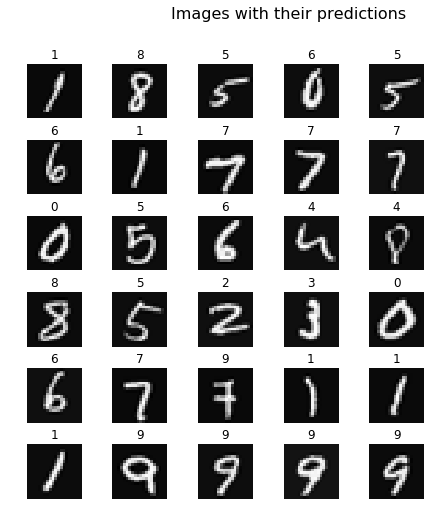

In [13]:
X,Y,m = ReadData('ImageDS.txt',',')
Y = Y.astype(int)
original_X = X
X = AddOnes(X)

labels = np.unique(Y)
total_labels = len(labels)
tn = X.shape[1]
all_theta = np.zeros((total_labels, tn))
lambd = 1

train = True
options = {'disp': False, 'maxiter':50}

plt_X = original_X[np.random.randint(X.shape[0], size=30),:]

print(f'There are a total of {total_labels} labels, which are : {labels}\n')

fname = "all_thetaOvA.pickle"

if os.path.isfile(fname):
    pickle_in = open("all_thetaOvA.pickle","rb")
    all_theta = pickle.load(pickle_in)
    pickle_in.close()

if train:
    
    for i in range(0,total_labels):
        Yi = np.where(Y == i, 1, 0)
        initial_theta = np.squeeze(all_theta[i,:])
        Result = op.minimize(fun = CostCalc, x0 = initial_theta, args = (X,Yi,m,lambd), method = 'BFGS',
                             jac = True, options=options)
        cost = Result.fun
        trained_theta = Result.x
        all_theta[i,:] = trained_theta
        print(f"The cost of {i}th iteration is {cost} and it's success is {Result.success} with the message '{Result.message}'")

    pickle_out = open("all_thetaOvA.pickle","wb")
    pickle.dump(all_theta, pickle_out)
    pickle_out.close()
    
    print('Training Done!\n')

P = Predict(all_theta, X)
Accuracy = np.mean(Y == P) * 100
print(f'Accuracy on training data = {Accuracy} %\n')

P = Predict(all_theta,AddOnes(plt_X))
P = np.squeeze(P)
ShowImages(plt_X,P,gray=True)